# Lecture 4: Network visualization

In this lecture we will learn how to visualize a network, emphasizing different aspects of it.

NetworkX does not have strong visualization capabilities. It primarily relies upon an old, and hacked together drawing function written to utilize matplotlib. This means that matplotlib drawing is slow, non-interactive, and has many visual bugs. For example, arrows for directed graphs are particularly unpleasant.

Now there are several options to visualize a network, also utilizing wrappers for python.

For these reasons, I do not recommended that NetworkX be used as a primary tool for visualization of graphs. 

In general, I think it is a rare instance when visualizing a graph can provide meaningful information. While many graph visualizations are aesthetically pleasing, they do not convey information about the graph that could be more easily discovered by analyzing the graph using different metrics. Moreover, because positional layouts can be arbitrary, they may cause people to view structure when there is none. This is is epeciall true as graphs become larger than 100 nodes.

Regardless here are some things that illustrate the basics of graph drawing in NetworkX. We will also learn the basics of network visualization with [Cytoscape](https://cytoscape.org/), a much more pleasant tool for this.

There are many other options, like [GraphViz](https://graphviz.org/), [Gephi](https://gephi.org/)... that you can explore!

## Visualization with NetworkX

The basic function for visualizing a network is `nx.draw()`

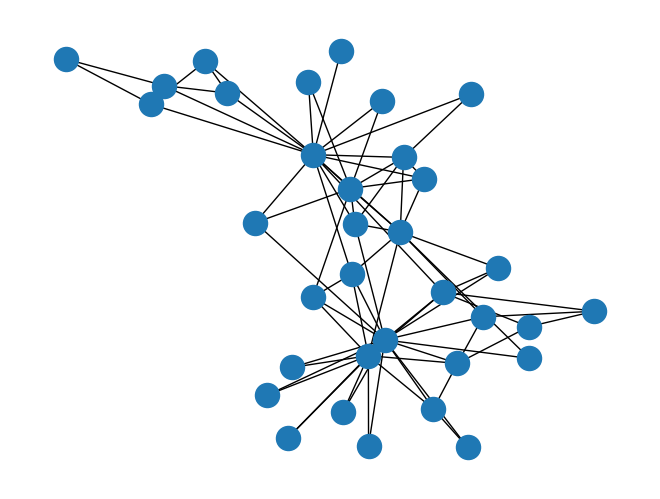

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.karate_club_graph()
nx.draw(G)

The `nx.draw` has quite a lot of functionality. Let's take some time looking at its documentation

In [2]:
nx.draw?

Signature: nx.draw(G, pos=None, ax=None, **kwds)
Docstring:
Draw the graph G with Matplotlib.

Draw the graph as a simple representation with no node
labels or edge labels and using the full Matplotlib figure area
and no axis labels by default.  See draw_networkx() for more
full-featured drawing that allows title, axis labels etc.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

ax : Matplotlib Axes object, optional
    Draw the graph in specified Matplotlib axes.

kwds : optional keywords
    See networkx.draw_networkx() for a description of optional keywords.

Examples
--------
>>> G = nx.dodecahedral_graph()
>>> nx.draw(G)
>>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

See Also
--------
draw_networkx
draw_networkx_nodes
d

In [3]:
nx.draw_networkx?

Signature: nx.draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
Docstring:
Draw the graph G using Matplotlib.

Draw the graph with Matplotlib with options for node positions,
labeling, titles, and many other drawing features.
See draw() for simple drawing without labels or axes.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

arrows : bool or None, optional (default=None)
    If `None`, directed graphs draw arrowheads with
    `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
    via `~matplotlib.collections.LineCollection` for speed.
    If `True`, draw arrowheads with FancyArrowPatches (bendable and stylish).
    If `False`, draw edges using LineCollection (linear and fast).
    For directed graph

### Layouts

Graph Layouts are algorithms dedicated to node positioning for graph drawing. Usually we will plot networks in 2 dimensions, although many real networks have a high effective dimensionality. Therefore many times it is very difficult to arrange the nodes in 2D space in a way that we can observe specific characteristics of the network. In order to arrange the nodes automatically we have graph layout algorithms. 

The layouts can be stored into a variable that will contain the positions of all the nodes. You can see the different options for layouts [here](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) or by typing `nx.layout.[TAB]`. Let's check several layouts in with the network we just created.

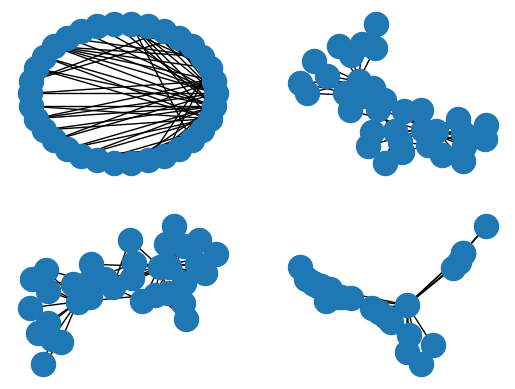

In [4]:
plt.subplot(221)
circ_layout = nx.circular_layout(G)
nx.draw(G,pos=circ_layout)
plt.subplot(222)
fr_layout = nx.fruchterman_reingold_layout(G)
nx.draw(G,pos=fr_layout)
plt.subplot(223)
spr_layout = nx.spring_layout(G)
nx.draw(G,pos=spr_layout)
plt.subplot(224)
spec_layout = nx.spectral_layout(G)
nx.draw(G,pos=spec_layout)

As you can see, the layout can make a big difference in identifying vissually certain characteristics of the network.

### Visualizing node properties

The basic plotting options that we can control in order to visualize node properties are

- Label.
- Color.
- Size.
- Shape.

#### Showing node labels

We can use the option `with_labels=True`, and the *name* of the nodes will be displayed inside the nodes. We can also give a list of labels to be displayed with the option `labels=label_dict`, where `label_dict` is a dictionary where the keys are the node names and the value is the label we want to use for each node. Also the font size and other properties can be changed.

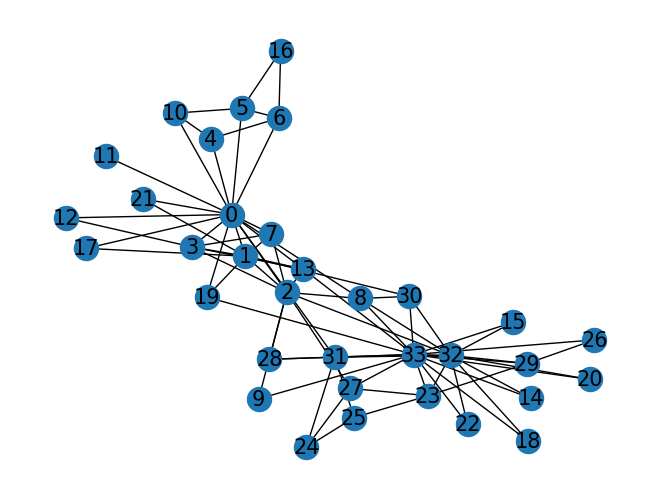

In [5]:
nx.draw(G,
        pos=fr_layout,
        with_labels=True,
        font_size=15) 

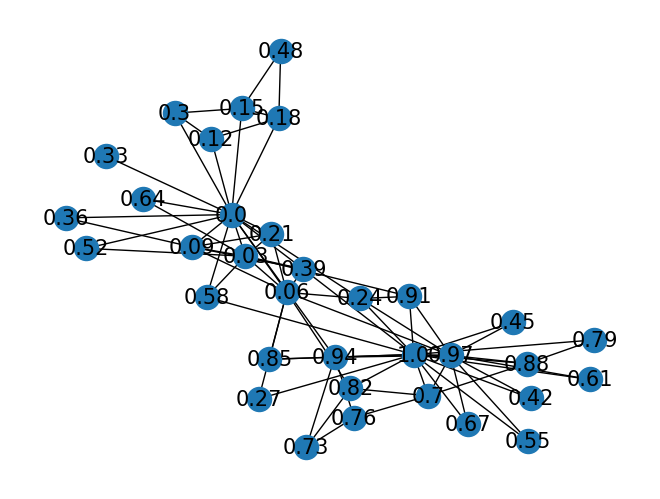

In [6]:
N = G.number_of_nodes()
label_dict = dict(zip(list(G.nodes()),np.round(np.linspace(0,1,N),2)))

nx.draw(G,
        pos=fr_layout,
        with_labels=True,
        font_size=15,
        labels=label_dict) 

#### Node color

To change node colors we can use the option `node_color`. You can give a color, an array of colors (of length equal to the number of nodes) or an array of numbers. The array of numbers willbe converted to a color using the `cmap` that is specified (`viridis` is the default) and the options `vmin` and `vmax` that will set the boundaries for the colormap (maximum and minimum in the data is the default). You can find more colormaps and their names[here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

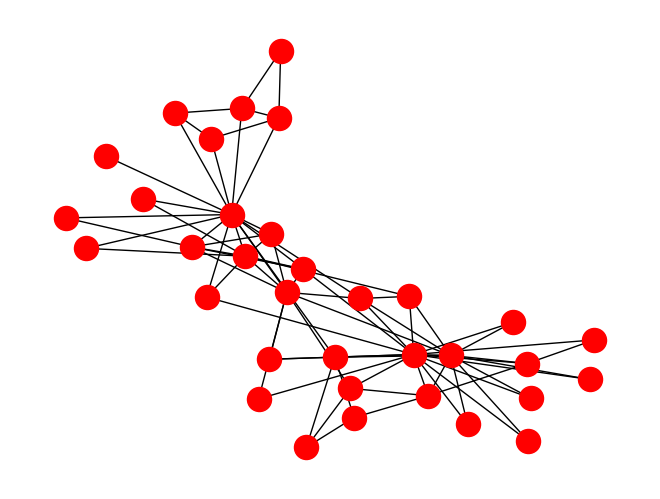

In [7]:
nx.draw(G,
        pos=fr_layout,
        node_color='r') 

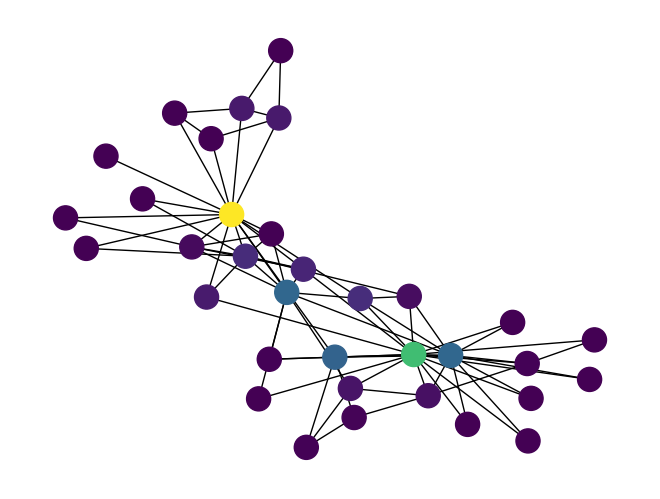

In [8]:
node_betweenness = [x for k,x in nx.betweenness_centrality(G).items()]
    
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness) 

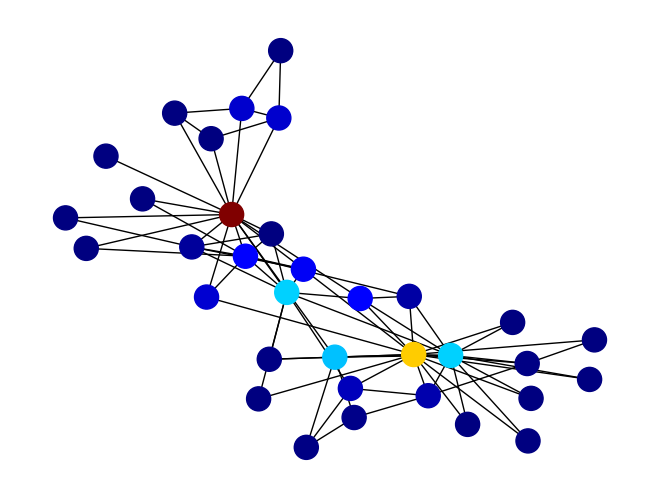

In [9]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        cmap='jet') 

#### Node size

Node size is controlled thruogh the parameter `node_size` works similarly to `node_color` in the sense that you can give a single number or a number for each of the nodes. Let's encode the degree of the node in its size.

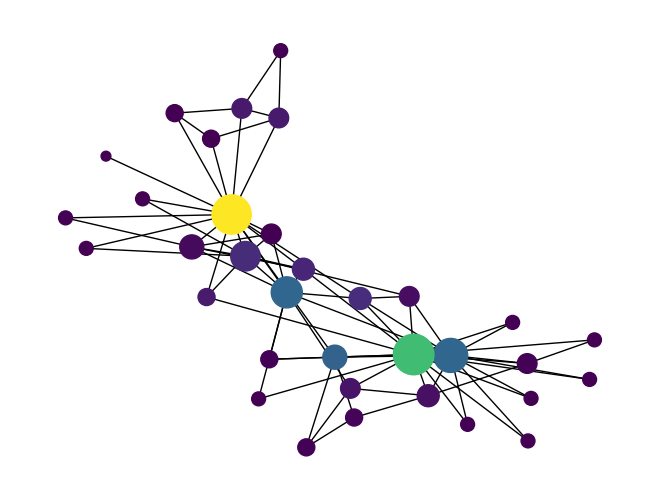

In [10]:
node_deg = np.array([k for x,k in dict(nx.degree(G)).items()])

nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg) 

#### Node shape

To change node shape you can use the parameter `node_shape`, which can take the values `so^>v<dph8*` Try them!

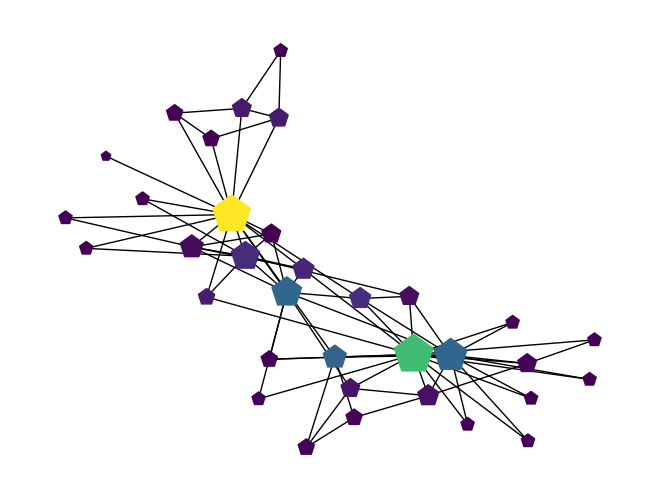

In [11]:
nx.draw(G,
        pos=fr_layout,
        node_color=node_betweenness,
        node_size=50*node_deg,
        node_shape='p') 

The problem with this is that you cannot decide a different shape for different nodes. To do this we will plot the nodes and the edges with different functions, `nx.draw_networkx_nodes()` and `nx.draw_networkx_edges()` respectively. 

In the function `nx.draw_networkx_nodes()` you can specify, through `nodelist`, the list of nodes that are going to be plotted.

##### Exercise

Plot the karate club network using different shapes for the nodes that belong to the club of `'Mr. Hi'` and to the club of `'Officer'`.

In [82]:
nx.draw_networkx_nodes?

Signature:
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=None,
    node_size=300,
    node_color='#1f78b4',
    node_shape='o',
    alpha=None,
    cmap=None,
    vmin=None,
    vmax=None,
    ax=None,
    linewidths=None,
    edgecolors=None,
    label=None,
    margins=None,
)
Docstring:
Draw the nodes of the graph G.

This draws only the nodes of the graph G.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary
    A dictionary with nodes as keys and positions as values.
    Positions should be sequences of length 2.

ax : Matplotlib Axes object, optional
    Draw the graph in the specified Matplotlib axes.

nodelist : list (default list(G))
    Draw only specified nodes

node_size : scalar or array (default=300)
    Size of nodes.  If an array it must be the same length as nodelist.

node_color : color or array of colors (default='#1f78b4')
    Node color. Can be a single color or a sequence of colors with the same
    length as nodelist. Color can be stri

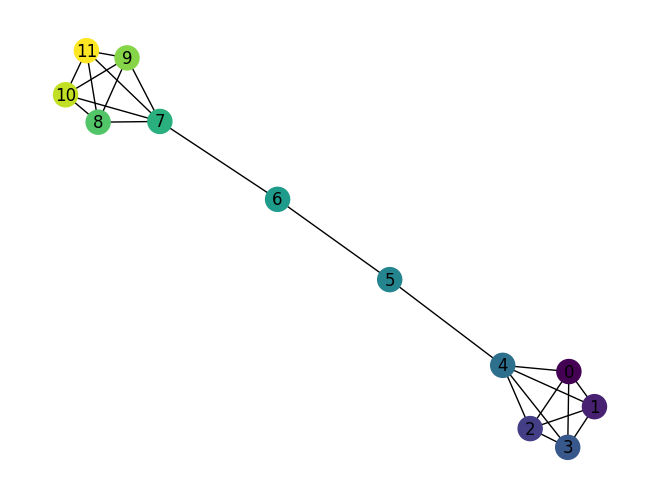

In [50]:
nx.draw(G,pos=pos,with_labels=True,node_color=G.nodes())

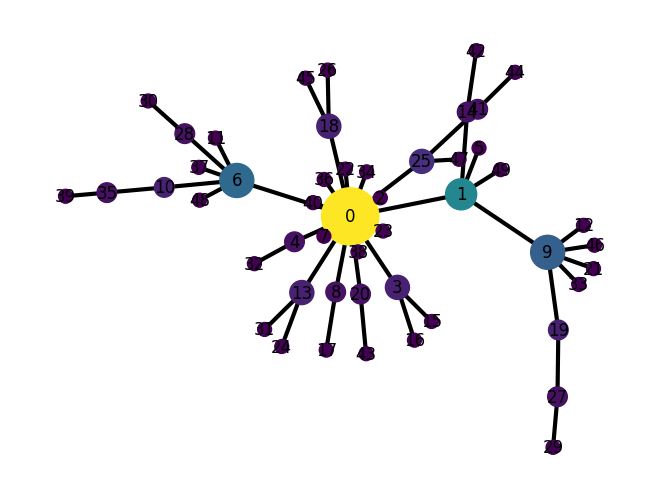

In [51]:
G = nx.barabasi_albert_graph(50,1)
nx.draw(G,with_labels=True,node_color=list(dict(nx.betweenness_centrality(G)).values()),width=3,node_size=100*np.array(list(dict(G.degree()).values())))

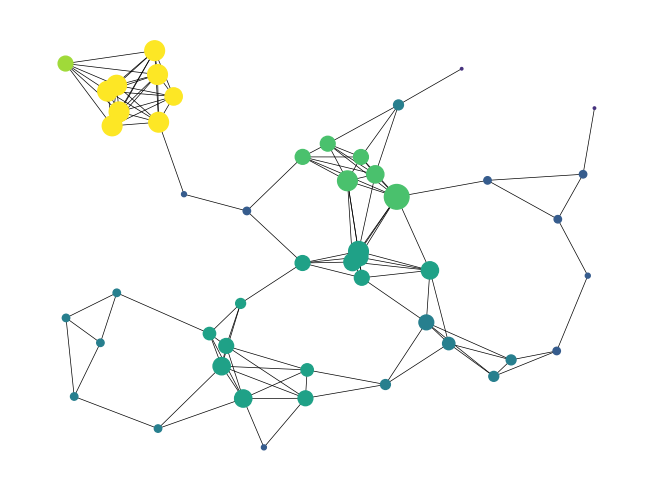

In [52]:
G = nx.random_geometric_graph(50,0.2)
kcore = nx.core_number(G)
core_color = [kcore[n] for n in G.nodes()]
pos = nx.get_node_attributes(G,'pos')
size = [3.14*G.degree(n)**2 for n in G.nodes()]
nx.draw(G,node_color=core_color,width=.5,pos=pos,node_size=size)